In [62]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
import pandas as pd
import time
import sys
from pathlib import Path

import src.my_mod as mmd
from skimage import feature as feat
import skimage.filters as flt
import json

Correction

In [63]:
fold=Path('kernels/').resolve()

kernels={}

for f in fold.glob('*.json'):
    with open(f) as js:
        kernels.update(json.load(js))

kernels

{'slope': [[0, 0, 1, 0, 0],
  [0, 2, 2, 2, 0],
  [1, 2, 5, 2, 1],
  [0, 2, 2, 2, 0],
  [0, 0, 1, 0, 0]],
 'gaus1': [[1, 2, 1], [2, 4, 2], [1, 2, 1]],
 'gaus2': [[1, 1, 2, 1, 1],
  [1, 2, 4, 2, 1],
  [2, 4, 8, 4, 2],
  [1, 2, 4, 2, 1],
  [1, 1, 2, 1, 1]],
 'gaus3': [[1, 4, 7, 4, 1],
  [4, 16, 26, 16, 4],
  [7, 26, 41, 26, 7],
  [4, 26, 16, 26, 4],
  [1, 4, 7, 4, 1]],
 'gaus4': [[1, 1, 2, 2, 2, 1, 1],
  [1, 2, 2, 4, 2, 2, 1],
  [2, 2, 4, 8, 4, 2, 2],
  [2, 4, 8, 16, 8, 4, 2],
  [2, 2, 4, 8, 4, 2, 2],
  [1, 2, 2, 4, 2, 2, 1],
  [1, 1, 2, 2, 2, 1, 1]],
 'high1': [[1, -1, -1], [-1, 9, -1], [-1, -1, -1]],
 'high2': [[0, -1, 0], [-1, 20, -1], [0, -1, 0]],
 'horizontal': [[0, 0, 0], [-1, 1, 0], [0, 0, 0]],
 'diagonal': [[0, 0, -1], [0, 1, 0], [0, 0, 0]],
 'gradient1': [[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]],
 'gradient2': [[1, 1, 1], [1, -2, 1], [-1, -1, -1]],
 'laplace1': [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
 'laplace2': [[1, -2, 1], [-2, 4, -2], [1, -2, 1]],
 'sobel_vertical': [[1, 0, -1], [

In [64]:
len(kernels)

15

In [65]:
%ls 

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est FC72-9952

 R�pertoire de c:\img_proc\lab_img5

25/05/2022  18:21    <DIR>          .
25/05/2022  18:21    <DIR>          ..
11/05/2022  17:24    <DIR>          __pycache__
10/05/2022  10:04            90�065 april_06.ipynb
10/05/2022  10:04           843�898 april_13.ipynb
10/05/2022  20:13         1�642�009 april_20.ipynb
12/05/2022  10:35           607�816 april_27.ipynb
06/04/2022  17:57               137 img5.yml
20/04/2022  18:21    <DIR>          imgs
25/05/2022  17:20    <DIR>          kernels
12/05/2022  10:35            96�460 may_04.ipynb
25/05/2022  17:15         4�558�236 may_11 (2).ipynb
25/05/2022  18:21                 0 may_25.ipynb
11/05/2022  17:28    <DIR>          src
               8 fichier(s)        7�838�621 octets
               6 R�p(s)  80�507�412�480 octets libres


In [66]:
im=np.array(Image.open('imgs/cameraman.tif'))

In [67]:
res=[]
for key,val in kernels.items():
    ker=np.array(val)
    res.append(mmd.convol_img(im,ker))
nam=list(kernels.keys())
mmd.show_im(*res,names=nam)
    


NameError: name 'pad' is not defined

In [ ]:
zoom=[]
for im_conv in res:
    zoom.append(im_conv[70:170,170:300])

mmd.img_show(*zoom,names=nam)

NameError: name 'nam' is not defined

# 1 scikit-image

In [68]:
dir(flt)

['LPIFilter2D',
 'apply_hysteresis_threshold',
 'butterworth',
 'correlate_sparse',
 'difference_of_gaussians',
 'farid',
 'farid_h',
 'farid_v',
 'frangi',
 'gabor',
 'gabor_kernel',
 'gaussian',
 'hessian',
 'inverse',
 'laplace',
 'median',
 'meijering',
 'prewitt',
 'prewitt_h',
 'prewitt_v',
 'rank',
 'rank_order',
 'roberts',
 'roberts_neg_diag',
 'roberts_pos_diag',
 'sato',
 'scharr',
 'scharr_h',
 'scharr_v',
 'sobel',
 'sobel_h',
 'sobel_v',
 'threshold_isodata',
 'threshold_li',
 'threshold_local',
 'threshold_mean',
 'threshold_minimum',
 'threshold_multiotsu',
 'threshold_niblack',
 'threshold_otsu',
 'threshold_sauvola',
 'threshold_triangle',
 'threshold_yen',
 'try_all_threshold',
 'unsharp_mask',
 'wiener',
 'window']

In [ ]:
# sobel_V
sob_v = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]).T
sob_v

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [ ]:
sob_h = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
sob_h

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [ ]:
ss=[]
nam=[]
for fun in dir(flt):
    if 'sobel' in fun:
        print(fun)
        tmp=eval(f'flt.{fun}(im)')
        nam.append(fun)
        ss.append(tmp)

sobel
sobel_h
sobel_v


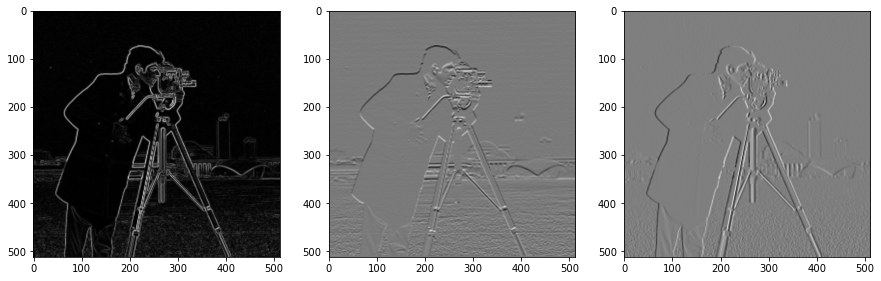

In [ ]:
mmd.img_show(*ss)

prewitt
flt.prewitt(im)
prewitt_h
flt.prewitt_h(im)
prewitt_v
flt.prewitt_v(im)


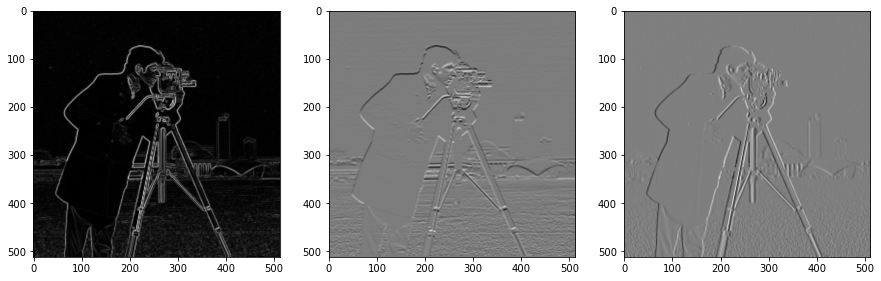

In [ ]:
prew=[]
nam=[]
for fun in dir(flt):
    if 'prewitt' in fun:
        print(fun)
        tmp=eval(f'flt.{fun}(im)')
        print(f'flt.{fun}(im)')
        nam.append(fun)
        prew.append(tmp)

mmd.img_show(*prew)

In [ ]:
nam

['prewitt', 'prewitt_h', 'prewitt_v']

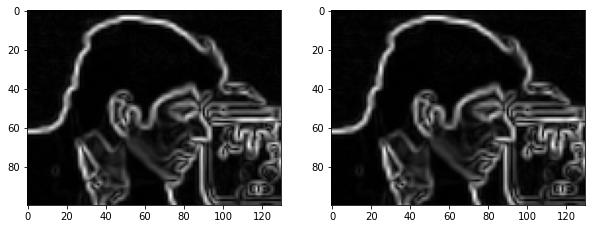

In [ ]:
mmd.img_show(ss[0][70:170,170:300],prew[0][70:170,170:300])

# 2 Canny filet

In [ ]:
[x for x in dir(feat) if not x.startswith('_')]

['BRIEF',
 'CENSURE',
 'Cascade',
 'ORB',
 'SIFT',
 'blob',
 'blob_dog',
 'blob_doh',
 'blob_log',
 'brief',
 'brief_cy',
 'canny',
 'censure',
 'censure_cy',
 'corner',
 'corner_cy',
 'corner_fast',
 'corner_foerstner',
 'corner_harris',
 'corner_kitchen_rosenfeld',
 'corner_moravec',
 'corner_orientations',
 'corner_peaks',
 'corner_shi_tomasi',
 'corner_subpix',
 'daisy',
 'deprecated',
 'draw_haar_like_feature',
 'draw_multiblock_lbp',
 'graycomatrix',
 'graycoprops',
 'greycomatrix',
 'greycoprops',
 'haar',
 'haar_like_feature',
 'haar_like_feature_coord',
 'hessian_matrix',
 'hessian_matrix_det',
 'hessian_matrix_eigvals',
 'hog',
 'local_binary_pattern',
 'match',
 'match_descriptors',
 'match_template',
 'multiblock_lbp',
 'multiscale_basic_features',
 'orb',
 'orb_cy',
 'peak',
 'peak_local_max',
 'plot_matches',
 'shape_index',
 'sift',
 'structure_tensor',
 'structure_tensor_eigenvalues',
 'structure_tensor_eigvals',
 'template',
 'texture',
 'util']

In [ ]:
feat.canny?

Signature:
feat.canny(
    image,
    sigma=1.0,
    low_threshold=None,
    high_threshold=None,
    mask=None,
    use_quantiles=False,
    *,
    mode='constant',
    cval=0.0,
)
Docstring:
Edge filter an image using the Canny algorithm.

Parameters
----------
image : 2D array
    Grayscale input image to detect edges on; can be of any dtype.
sigma : float, optional
    Standard deviation of the Gaussian filter.
low_threshold : float, optional
    Lower bound for hysteresis thresholding (linking edges).
    If None, low_threshold is set to 10% of dtype's max.
high_threshold : float, optional
    Upper bound for hysteresis thresholding (linking edges).
    If None, high_threshold is set to 20% of dtype's max.
mask : array, dtype=bool, optional
    Mask to limit the application of Canny to a certain area.
use_quantiles : bool, optional
    If ``True`` then treat low_threshold and high_threshold as
    quantiles of the edge magnitude image, rather than absolute
    edge magnitude value

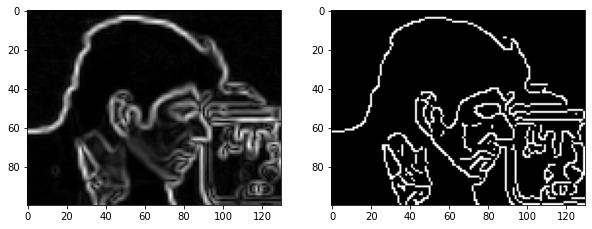

In [ ]:
can_im=feat.canny(im)
mmd.img_show(ss[0][70:170,170:300],can_im[70:170,170:300])

In [ ]:
np.unique(can_im)

array([False,  True])

# 2.1 gradient

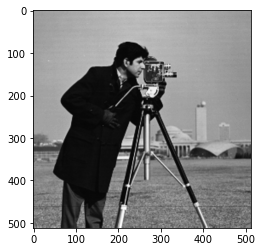

In [ ]:
mmd.img_show(im)

In [ ]:
ar=np.ones((3,3))*155
ar, sob_v

(array([[155., 155., 155.],
        [155., 155., 155.],
        [155., 155., 155.]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [ ]:
ar*sob_v,(ar*sob_v).sum()/1

(array([[-155.,    0.,  155.],
        [-155.,    0.,  155.],
        [-155.,    0.,  155.]]),
 0.0)

In [ ]:
ar=np.ones((3,3))*50
ar[:,-1]=150
ar

array([[ 50.,  50., 150.],
       [ 50.,  50., 150.],
       [ 50.,  50., 150.]])

In [ ]:
sob_v.sum()

0

In [ ]:
ar*sob_v,(ar*sob_v).sum()/1

(array([[-50.,   0., 150.],
        [-50.,   0., 150.],
        [-50.,   0., 150.]]),
 300.0)

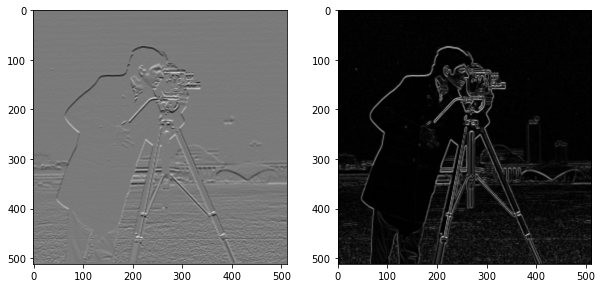

In [ ]:
mmd.img_show(*ss[1:])

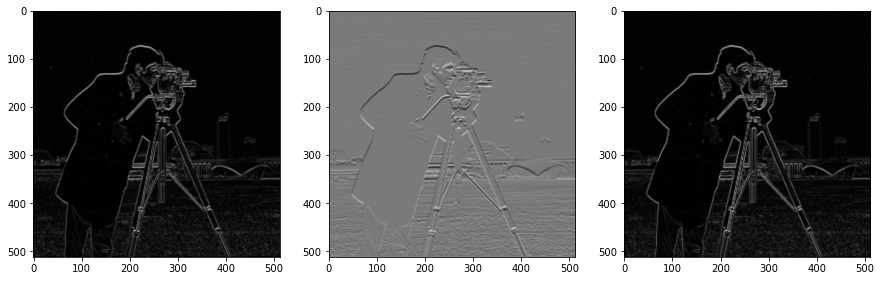

In [ ]:
grad=np.hypot(*ss[1:])
mmd.img_show(grad,*ss[1:])

In [69]:
grad.min(),grad.max()

(0.0, 1.1817577274606323)

## 2.2 Directions

$tan = \frac{dy}{dx} = \frac{grad_y}{grad_x}$

$arctan$

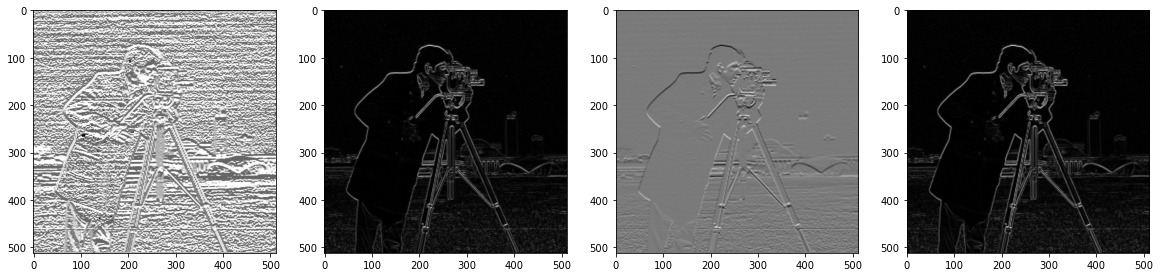

In [71]:
angle=np.rad2deg(np.arctan2(ss[-1],ss[-2]))
mmd.img_show(angle,grad,*ss[1:])

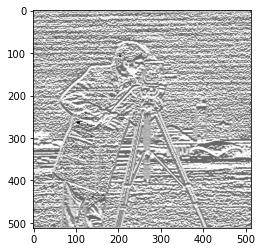

In [76]:
mmd.img_show(angle,figsize=10)##manque

In [72]:
angle.min(),angle.max()

(0.0, 129.23152048359225)

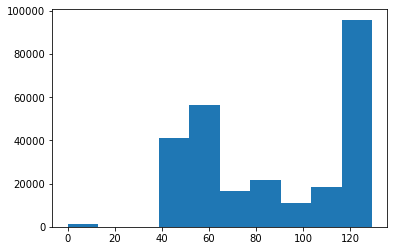

In [74]:
plt.hist(angle.ravel());